# The Linear Model Assumptions
Last week, we outlined the modelling framework behind both simple and multiple regression. In doing so, we made a number of assumptions that allowed for this framework to be tractable and useable. However, we never acually checked whether any of these assumptions actually held when using our example data. In this section, we will discuss each of the assumptions we made, as well as ways of checking those assumptions. In the rest of this lesson, we will discuss tactics that can be employed when those assumptions appear to be violated.

`````{admonition} The Generality of Assumptions
:class: tip
One of the bigger benefits of using a linear models framework is that, irrespective of the model form, the assumptions remain the same. As such, even though we will be framing these assumptions in relation to muliple regression, all the methods we will discuss are also directly relevant to $t$-tests, ANOVA and ANCOVA models. This means we can use the same diagnostics to check the same assumptions across any model. Practically, this means we only need to learn *one* set of assumptions and then can apply them to any model we choose. This is much more efficient than the typical approach of listing assumptions separately for regression, ANOVA and ANCOVA models. Furthermore, the solutions used to accommodate violations of these assumptions can be applied across regression, ANOVA and ANCOVA models, meaning that this lesson should be seen as a flexible set of tools that can be used for *all* basic linear models, not just regression models.
`````

## The Nature of Assumptions, Visual Checks and Tests
Before discussion the assumptions themseleves, it is important that we establish a suitable perspective on assumptions and assumption testing. Typically, in the behavioural sciences, assumptions are not often adequately checked. In part, this reflects a lack of appreciation for the importance of assumptions and, in part, reflects a lack of confidence around what to do if the assumptions are violated. When assumptions *are* tested, this is typically via *inferential tests*. In this course, we are going to advise against relying on tests for assessing assumptions. Instead, our focus will be on visual inspection of the assumptions. One of the most important reasons for this is that assumptions should not be considered as black-and-white assessments of *met* or *violated*. In reality, no data will ever be perfectly normally distributed. No data will have identical variances across its range. No relationship will be a perfect straight line. Assumptions are an idealisation of reality for the purpose of mathematical simplicity. Our job is to determine whether the data are *close enough* for our conclusions to be accurate. If they are not close enough, then we need to either try and make adjustments to the data or model, or we have to accept the consequences of these violations. We can still use models that appear to not meet all the assumptions, but this weakens the model's accuracy and more care must be taken when reaching conclusions. Real world data is messy and so it is important to maintain both an appropriate perspective on the role of assumptions, as well as having enough tools available to deal with data that does not adequately adhere to those assumptions.

### Using Visual Assessments


### Why Tests of Assumptions are Flawed
One of the reasons why researchers are sometimes uncomfortable with visual assessments is because they think that the interpetion is too subjective. Of course, there is a subjective element to deciding whether the assumptions appear adequately met, however, the belief that there is some objective alternative to determine this is flawed. Because inferential tests of these assumptions exist, there is a belief that these methods therefore provide a way of determining whether the assumptions are violated that is free from researcher bias. However, these tests are flawed. In the previous section, we discussed the problems with $p$-values and these issues carry-over into the world of inferential tests of model assumptions. If we do not believe that data will ever be *perfectly* normally distribution, or have *exactly the same* variance across the range of a variable, then the null hypothesis is known *a priori* to not be true. So why are we testing it? In this situation, the $p$-value is just a point on a power curve and all we need is enough data in order to conclude a significant violation of the assumption. The better perspective is to ask the question "are these data close enough to these ideal conditions for us to trust the $p$-value calculation?" Yet this is not the question that inferential tests ask. Furthermore, tests of assumptions require assumptions themseleves in order to calculate $p$-values. Although rarely checked, the use of inferential tests for this purpose is then somewhat circular. Do we need inferential tests to check the assumptions of the inferential tests of assumptions? 

#### Example 1: Non-normal Distribution in a Small Sample
We can demonstrate some of these issue using simulated data. Here, we will use the Shapiro-Wilk test of normality to illustrate some problems. Firstly, we will generate a small sample of data from a $t$-distribution. Importantly, this is *not* a normal distribution and so if the test is objective and correct it should tell us that there is a significant depature from normality. Let us see what happens.

In [47]:
options(repr.plot.width=12, repr.plot.height=7)


	Shapiro-Wilk normality test

data:  y
W = 0.95294, p-value = 0.5719



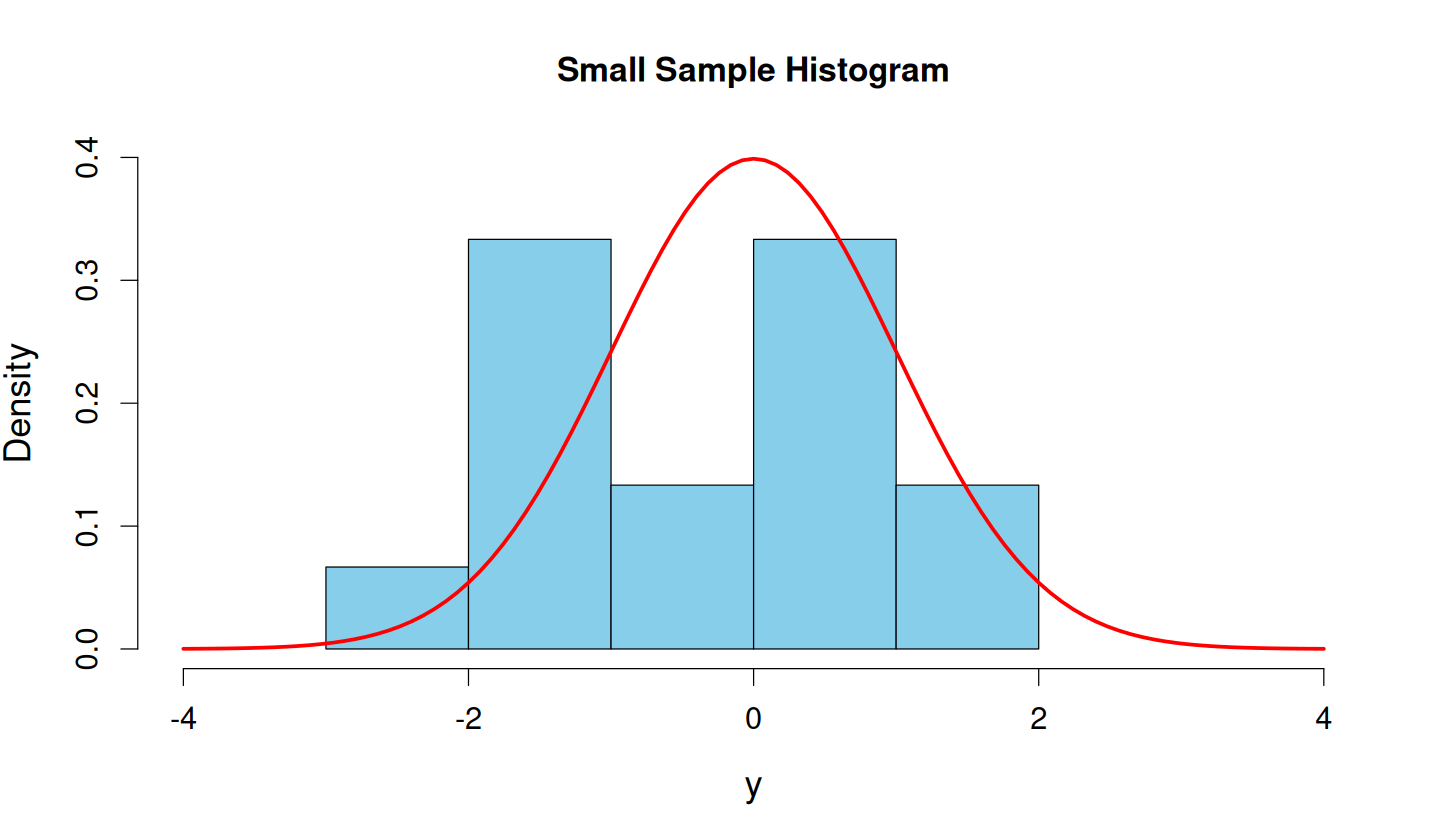

In [50]:
set.seed(666)
n <- 15
y <- rt(n, df=3)

# Run Shapiro-Wilk test
shap.test <- shapiro.test(y)
print(shap.test)

# Visualisation
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
hist(y, probability=TRUE, main="Small Sample Histogram", 
     col="skyblue", ylim=c(0,.4), xlim=c(-4,4))
curve(dnorm(x), col="red", lwd=3, add=TRUE)

The test has produced a *non-significant* $p$-value, which tells us that the test has failed to reject the null hypothesis that our data comes from a normal distribution. This would usually be interpreted as *no significant depature from normality* The important point is that we know this is wrong. Would we have noticed this lack of normality from the visualisation? Looking the plot, we can see that the small sample actually makes it quite difficult to determine the distribution. Based on this, we should at least be wary of accepting any particular shape, but this is not a subtlety that can be conveyed with the test. Importantly, the inferential test has not provided us with a correct objective alternative to our "subjective" interpretation of the plots. So what is the point of it?

#### Example 2: Trivial Depatures from Normality in a Large Sample
Let us see another example. This time we generate a large sample with a trivial depature from normality. The way we do this is by mixing together two normal distributions such that the overall distribution is only slightly non-normal. The aim is to do this in such a subtle way that it would have no practical implications. Given that we do not think data will ever *perfectly* ahere to a normal distribution, this is a situation where the data are close enough to the ideal for us to be confident that $p$-values can be used accurately. But let us see what the test says.


	Shapiro-Wilk normality test

data:  y
W = 0.99836, p-value = 0.04526



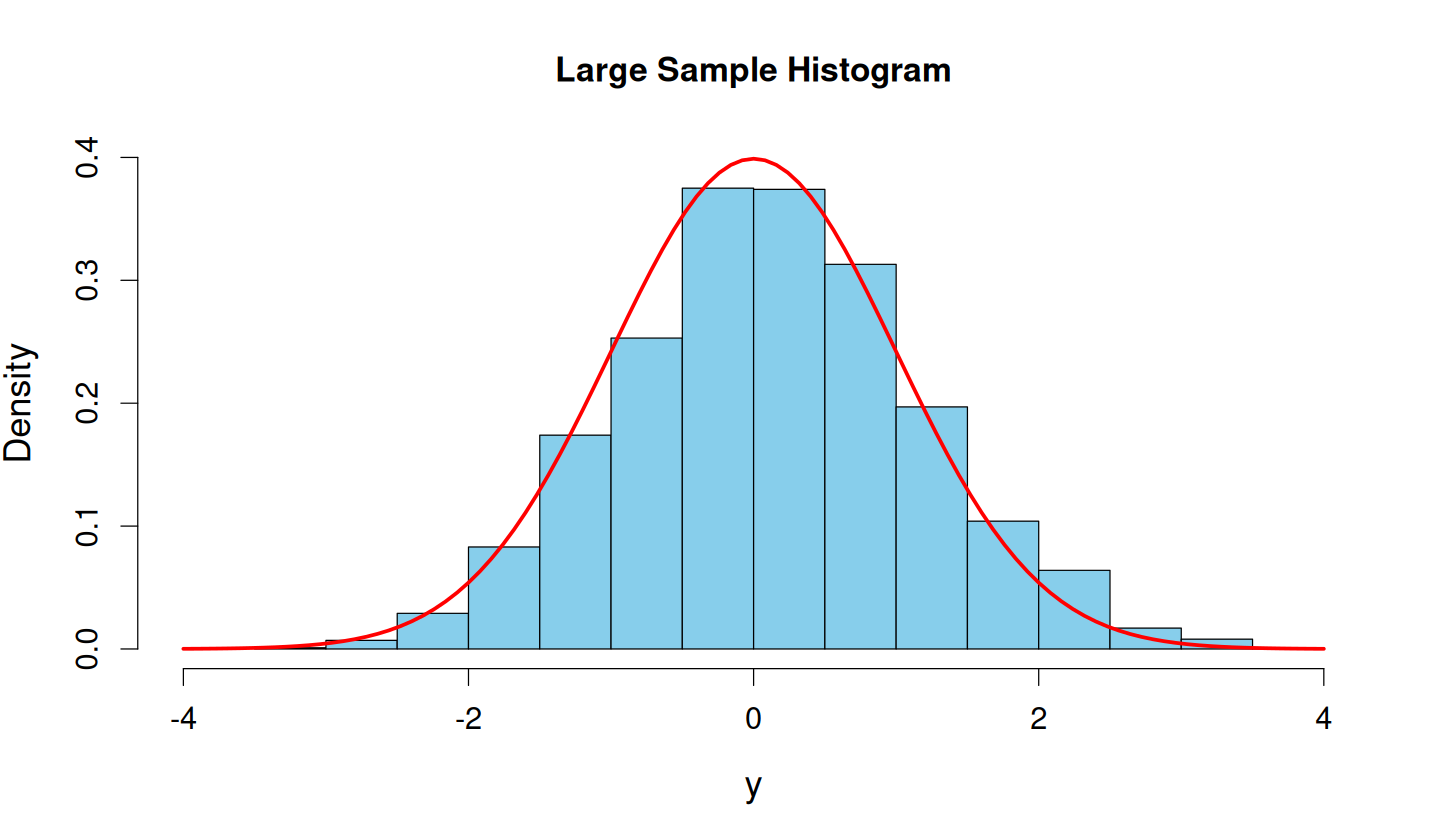

In [51]:
set.seed(123)
n <- 2000
y <- c(rnorm(n*0.9, mean=0, sd=1),
       rnorm(n*0.1, mean=1, sd=1))

# Run Shapiro-Wilk tests
shap.test <- shapiro.test(y)
print(shap.test)

# Visualisation
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
hist(y, probability=TRUE, main="Large Sample Histogram", 
     col="skyblue", ylim=c(0,.4), xlim=c(-4,4))
curve(dnorm(x), col="red", lwd=3, add=TRUE)


Here, the test says that there is a *significant* violation of normality. The test is not wrong, however, looking at the histogram it is very clear that whatever violation there has been is very trivial and that, practically, the distribution looks as close to normal as we are ever likely to see with real data. Based on this histogram, any attempt to correct for non-normality would likely be taken as wildly inappropriate and unnecessary. However, if we just believed the test then we would be off on a wild goose chase of trying to accomodate this violation. Again, visualising this assumption gives us the richest information for deciding how close to normal the distribution is and how comfortable we are relying on results that depend upon this assumption.

## The Regression Assumptions
Before moving on, it will be useful to take a step back and examine all the *assumptions* that are inherent in the model we have specified. This is quite an important exericse, because the assumptions of regression often seem somewhat esoteric when taught outside the framework of statistical models. However, we should be able to derive all of them by simply examining the model equations given above. This is the same approach we will take when we also examine models such as ANOVA and ANCOVA, which will allow us to see that the assumptions *are always the same* when working with these forms of linear models. This means you only need to learn one set of assumptions and they can be applied equivalently across lots of different models. We look at this in more detail next week, so for now we will just have a brief discussion of each.

To make this discussion easier, we will restate the most common form of the simple regression model:

$$
\begin{align*}
    y_{i}   &= \beta_{0} + \beta_{1}x_{i} + \epsilon_{i} \\
    \epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right),
\end{align*}
$$

### (1) The Outcome is a Continuous Random Variable
The first core assumption that we made is that the outcome variable is a continuous random variable. As such, the *data-generating process* can be captured by a continuous probability distribution. This means our outcome variables must, in theory, have an infinite number of possibilities within a given range. Refer back to the lesson last week for more details on this, as well as some of the subtlties around psychologists using discrete measures and treating them as continuous.

### (2) The Distribution of the Errors is Normal
Following from the first assumption, we have chosen the normal distribution as the population distribution. This can be stated in two ways. The first is as a *marginal* distribution of $y$, given a specific value of $x$. This is expressed as:

$$
y_{i} \sim \mathcal{N}\left(\beta_{0} + \beta_{1}x_{i},\sigma^{2}\right)
$$

This assumption is important to understand, not least because many people *get it wrong*. As should be clear from the equation above, the simple regression model does *not* assume that the entire outcome variable $y$ is normally distributed. Instead, the assumption is that the distribution of $y$ *at each value of $x$* is normally distributed. Considering only the distribution of a *subset* of $y$ values is known as the *marginal* distribution of $y$ given certain values of $x$. However, as we will see next week, this is difficult to work with practically. As such, it is much easier to work with the second form that this assumption takes, which is that the *errors* are *identically distributed* with mean 0, expressed as

$$
\epsilon_{i} \sim \mathcal{N}\left(0,\sigma^{2}\right).
$$

Every error is therefore drawn from *the same distribution*. In other words, the errors represents a *sample* from a single distribution. Because of this, we can collapse all the errors together and just examine a *single distribution*. Again, refer back to the content from last week if you need a reminder on why this assumption can be stated in two different ways.

### (3) The Data/Errors are Uncorrelated
... Typically, this is not actually an assumption we test, rather we infer it based on the context of the data collection. For instance, in the `mtcars` example, there is no reason to think that the measurement of `mpg` from one car would impact the measurement from any other car. We therefore assume that all cars are independent and there will be no correlation. However, if we made the same measurement multiple times *on the same car*, then we would probably assume some degree of correlation (this would be an example of *repeated measurements*). Similarly, if we made these measurements over certain time-intervals, then the data would represent a *time-series*, which then would have a very specific correlation structure where values closer in time are more similar than those measured further away. The same is true of working with human subjects. When each measurement represents a different subject, we will typically assume independence. However, multiple measures of the same subject imply some degree of correlation

`````{admonition} i.i.d. Errors
:class: tip
One of the more important assumptions about bothe the data and errors in a simple regression model is that they are *uncorrelated*. Formally, we can write

$$
\text{Corr}\left(y_{i},y_{i^{\prime}}\right) = \text{Corr}\left(\epsilon_{i},\epsilon_{i^{\prime}}\right) = 0.
$$

Here, the *prime* symbol ($\prime$) just means "a different value of $i$". So $\text{Corr}\left(y_{i},y_{i^{\prime}}\right)$ just means "the correlation between two different values of $i$". So, in words, this is saying that the correlation between two different values of $y$ is the same as the correlation between the same values of $\epsilon$, which is equal to 0. This effectively tells us that the values of the outcome/errors *are not correlated*.  

The reason this is important is because correlation adds quite a lot of complexity to modelling the data. As such, the basic linear models framework assumes there is none in order to make things simpler. Unfortunately, this precludes several different types of data. Generally speaking, we do not test for correlation, rather we assume it is present or not present based on the experimental design. For instance, if each datapoint represents a measurement from a *different* subject (a *between-subjects* design), then it is reasonable to assume that the data will not be correlated. However, if each datapoint represents a measurement from *the same* subject (a *within-subjects* design), then it is reasonable to assume that data from the same subject *will* be correlated. As such, if we are assuming no correlation then the linear model is not suitable for *repeated measurements* or *longitudinal* data. We will see how to cope with these forms data later in the course when we get to *mixed-effects* models. But, for the time being, we will only be working with data assumed to be *independent*.

So, the linear model assumes that both the raw data and the errors are *independant*. However, another useful element of the errors is that they are *identically distributed*. Which is to say that each error is conceptualised as drawn from the same distribution with the same mean and the same variance. This is not true of the outcome variable, because the mean depends upon the values of the predictors. We will see the utility of this next week when we cover diagnostic measures for the linear model. However, for the moment, it is worth noting that the errors are therefore assumed to be *independent* and *identically distributed*, which is a condition often shortened to i.i.d. and expressed using the notation

$$
\epsilon_{i} \overset{i.i.d.}{\sim} \mathcal{N}\left(0,\sigma^{2}\right).
$$

So the i.i.d. assumption for the errors captures the idea that all the errors are random draws from the *same* distribution, and that there is no correlation between them.
`````

`````{admonition} Residuals are Not Independent with Constant Variance
:class: tip
One of the main reasons for distinguishing between *errors* and *residuals* is that the estimation process *changes* the distributional properties of the errors. This means that *errors* and *residuals* are not expected to behave idnetically. So while it is correct to assume

$$
\epsilon_{i} \overset{\text{i.i.d.}}{\sim} \mathcal{N}\left(0,\sigma^{2}\right),
$$

it is *not* technically correct to assume the same for the *errors*. This is because the estimation procedure can *induce* correlation between the errors and the errors can have non-constant variance, depending upon a property known as *leverage*. We will discuss some of these concepts next week. For now, just note that the residuals can be used as an *approximation* for the errors, but we need to perform some additional checks to make sure that this approximation is reasonable.
`````


`````{admonition} The Complexity of Repeated Measurements
:class: tip
As indicated above, the typical linear regression model is *not* suitable for repeated measurements. However, these forms of experimental design are so common in Experimental Psychology that they are usually introduced very early on, without much appreciation for the complexity they add to the model. Because of this, everything we cover in this unit will only be applicable to *independent measures* deisgns (also known as *between-subjects* experiments). We will cover how to deal with repeated measurements in the context of *mixed-effects models* later on the course. However, we have a lot of ground to cover before we get there.
`````

### (4) The Relationship is a Straight Line
Implicit in the mean function we have specified is the assumption that the relationship in the population that generated our data is a *straight line*. This is not something we can every truly know without access to the whole population. However, we need to examine whether a straight line appears *reasonable*, given the data we have available. This involves examining the fit of the line visually. As we will see next week, this can either be done using just the raw data or, more usefully, can be assessed using some special plots using the residuals.

### (5) The variance is constant

[^greekfoot]: Ifyou are not very comfortable with this, we would recommend spending some time learning the Greek alphabet. Not only will this help you get more used to the symbols being used, but will also help in terms of communication. You will not be able to verbalise anything about a model if you do not know how to pronounce the Greek alphabet. 

## Visual Checks of the Regression Assumptions